In [14]:
# pca(principal component analysis) dimension reduction
# if the data is available in '30' dimension then we convert it into '2D' for better usage

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
# variance and covariance
# variance
    # Variance measures the spread of data points around the mean in a dataset. It
    # it is a data distribution with respect of mean
    # 
# co variance
    

In [17]:
# step 1 : stanardizing the data
# setp 2 : computing the covvariance matrix
# step 3 : calculating eigen values and eigen vectors
# step 4: selecting principal components
# step 5: tranforming the data

In [18]:
# loading the dataset
from sklearn.datasets import load_breast_cancer

In [19]:
cancer = load_breast_cancer(as_frame=True)
data = cancer.frame

In [20]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [54]:
data.shape

(569, 31)

In [56]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [22]:
# creating a dataframe using cancer dataset
df = data[cancer['feature_names']]



In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [24]:
df_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

 # Step 2 : computing the covvariance matrix


In [25]:
X=df.copy()
X.shape

(569, 30)

In [26]:
X_mean = X.mean()
# standard deviation
X_std = X.std()
# standardization
Z=(X-X_mean)/X_std

In [27]:
# finding covariance
c = Z.cov()

In [28]:
X_mean

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

<Axes: >

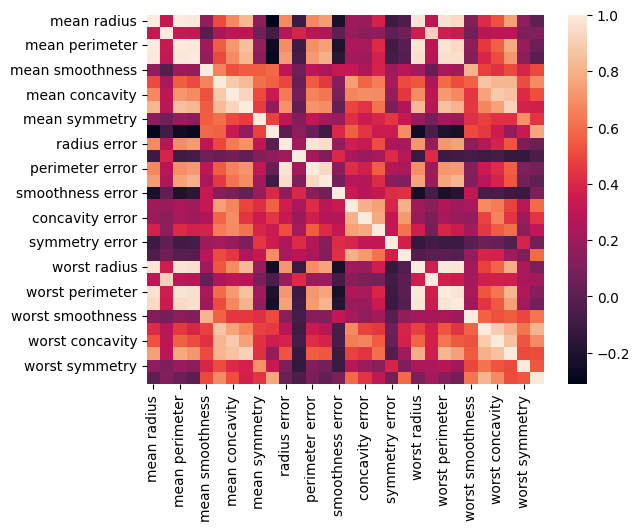

In [29]:
sns.heatmap(c)

# step 3 : calculating eigen values and eigen vectors

In [30]:
eigenvalues, eigenvectors = np.linalg.eig(c)

In [31]:
# sort eigen values
idx = eigenvalues.argsort()[::-1]

In [32]:
# sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

In [33]:
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:, idx]

In [34]:
# explained variance:
explained_var = np.cumsum(eigenvalues)/ np.sum(eigenvalues)

# step 4: Selecting the principal components

In [35]:
n_components = np.argmax(explained_var>=0.5)+1

In [36]:
n_components

2

In [37]:
# applying PCA Techinque
from sklearn.decomposition import PCA

In [38]:
pca = PCA (n_components=2)

In [39]:
df_pca = pca.fit_transform(df_scaled)

In [40]:
df_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

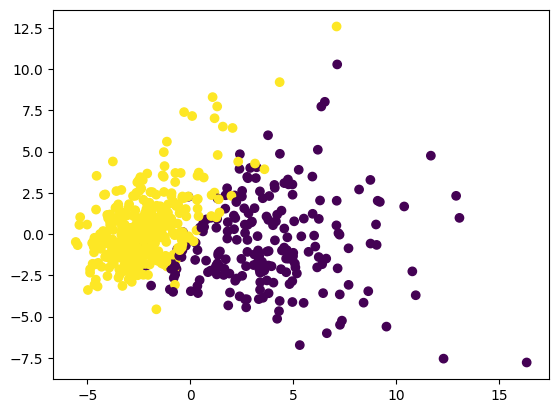

In [41]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cancer['target'])

In [42]:
# assignment
# model training

In [45]:
from sklearn.model_selection import train_test_split
X = df_pca
y = cancer['target']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

In [48]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Predict on the test set
y_pred = model.predict(X_test)

In [57]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [52]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        43\n           1       0.99      1.00      0.99        71\n\n    accuracy                           0.99       114\n   macro avg       0.99      0.99      0.99       114\nweighted avg       0.99      0.99      0.99       114\n'

In [53]:
confusion_matrix(y_test, y_pred)

array([[42,  1],
       [ 0, 71]], dtype=int64)

In [ ]:
# 'llm' ma 'bert' free hunxa

In [ ]:
taplejung.groupby('Local Level Name'